# Alura Store Brasil

## Problema de negócio:
Você foi contratado como pessoa analista de dados para ajudar Sr. João a decidir **qual loja ele deve vender.**

O Sr. João tem uma rede de quatro lojas, que pertencem ao e-commerce Alura Store. Ele quer vender uma dessas lojas para ter um capital e investir em um novo negócio. 

Você, como pessoa analista de dados, vai **analisar qual dessas lojas tem o menor desempenho comparado às outras e, baseado nisso, fazer um relatório e mostrar para Sr.João qual loja ele deve vender.**

Para isso, você vai analisar as seguintes métricas: `faturamento total de cada loja`, `categorias mais populares`, `média de avaliação dos clientes`, `produtos mais e menos vendidos` e `custo médio do frete`. 

Com essas métricas, você será capaz de decidir qual loja Sr.João deve vender.

---

# Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 0. Análise inicial dos dados

## Análise das colunas

Vamos verificar se as lojas possuem nomes de colunas diferentes e se possuem dados nulos.

In [2]:
loja.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

In [3]:
loja2.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

In [4]:
loja3.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

In [5]:
loja4.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

> As lojas possuem as colunas com mesmo nome.
---

In [6]:
loja.isnull().sum()

Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64

In [7]:
loja2.isnull().sum()

Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64

In [8]:
loja4.isnull().sum()

Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64

> Não há valores nulos nas lojas.
---

## Análise estatística dos dados

In [9]:
loja.describe()

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,650.491361,34.691805,3.976685,2.943196,-20.763366,-47.349385
std,819.582778,43.814183,1.415370,2.819897,5.372400,4.183180
min,10.070000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,74.345000,4.141783,3.000000,1.000000,-22.250000,-48.790000
50%,313.750000,16.498835,5.000000,1.000000,-22.190000,-48.790000
75%,904.130000,48.050074,5.000000,4.000000,-18.100000,-44.380000
max,3969.380000,214.377060,5.000000,24.000000,1.410000,-36.590000


In [10]:
loja2.describe()

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,630.970352,33.621941,4.037304,2.902501,-20.473243,-47.098508
std,794.078997,42.321932,1.356153,2.848416,5.321015,4.169111
min,10.160000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,72.730000,3.904020,4.000000,1.000000,-22.250000,-48.790000
50%,290.960000,15.406740,5.000000,1.000000,-22.190000,-48.790000
75%,903.580000,47.250196,5.000000,4.000000,-18.100000,-44.380000
max,3937.850000,216.707633,5.000000,24.000000,1.990000,-36.590000


In [11]:
loja3.describe()

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,620.612560,33.074464,4.048326,2.967783,-20.405396,-47.129233
std,774.191691,41.260516,1.386426,2.812153,5.465572,4.197520
min,10.080000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,76.560000,4.149261,4.000000,1.000000,-22.250000,-48.790000
50%,301.670000,15.879702,5.000000,2.000000,-22.190000,-48.790000
75%,888.040000,46.635503,5.000000,4.000000,-18.100000,-44.380000
max,3957.620000,211.257624,5.000000,24.000000,1.990000,-36.590000


In [12]:
loja4.describe()

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000
mean,587.149101,31.278997,3.995759,2.896098,-20.494215,-47.107553
std,758.341290,40.373136,1.403063,2.730393,5.433033,4.159156
min,10.170000,0.000000,1.000000,1.000000,-30.170000,-65.100000
25%,71.225000,3.847061,3.000000,1.000000,-22.250000,-48.790000
50%,279.315000,14.614197,5.000000,1.000000,-22.190000,-48.790000
75%,845.577500,44.438533,5.000000,4.000000,-18.100000,-44.380000
max,3869.560000,206.325555,5.000000,18.000000,1.410000,-36.590000


> Com essa análise estatística inicial com describe, podemos tirar insights quanto à grandeza do Frete e do Preço dos produtos.

> Ambos estão em reais normais, ou seja, não estão com seus valores na escala de milhões ou bilhões, mesmo com uma grande quantidade de números após o ponto flutuante.


---

## Análise dos métodos de pagamento usados pelos clientes

In [13]:
loja.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

In [14]:
print('Métodos de Pagamento - Loja 1', loja['Tipo de pagamento'].unique())
print('Métodos de Pagamento - Loja 2', loja2['Tipo de pagamento'].unique())
print('Métodos de Pagamento - Loja 3', loja3['Tipo de pagamento'].unique())
print('Métodos de Pagamento - Loja 4', loja4['Tipo de pagamento'].unique())

Métodos de Pagamento - Loja 1 ['cartao_credito' 'boleto' 'cupom' 'cartao_debito']
Métodos de Pagamento - Loja 2 ['boleto' 'cartao_credito' 'cupom' 'cartao_debito']
Métodos de Pagamento - Loja 3 ['cartao_credito' 'boleto' 'cupom' 'cartao_debito']
Métodos de Pagamento - Loja 4 ['cartao_credito' 'boleto' 'cupom' 'cartao_debito']


In [15]:
loja['Tipo de pagamento'].value_counts()

Tipo de pagamento
cartao_credito    1704
boleto             483
cupom              137
cartao_debito       35
Name: count, dtype: int64

In [16]:
loja2['Tipo de pagamento'].value_counts()

Tipo de pagamento
cartao_credito    1721
boleto             467
cupom              141
cartao_debito       30
Name: count, dtype: int64

In [17]:
loja3['Tipo de pagamento'].value_counts()

Tipo de pagamento
cartao_credito    1753
boleto             468
cupom              101
cartao_debito       37
Name: count, dtype: int64

In [18]:
loja4['Tipo de pagamento'].value_counts()

Tipo de pagamento
cartao_credito    1720
boleto             482
cupom              125
cartao_debito       31
Name: count, dtype: int64

#### Em todas as quatro lojas, predominam as vendas com o método de pagamento `cartão de crédito`, com mais de 1000 vendas com cartão de crédito em todas as lojas.

---

# 1. Análise do faturamento

## Calculando o faturamento das lojas

In [19]:
faturamento_loja1 = loja.Preço.sum()
faturamento_loja2 = loja2.Preço.sum()
faturamento_loja3 = loja3.Preço.sum()
faturamento_loja4 = loja4.Preço.sum()

In [20]:
print(f'''FATURAMENTOS
        Loja 1: {faturamento_loja1},
        Loja 2: {faturamento_loja2},
        Loja 3: {faturamento_loja3},
        Loja 4: {faturamento_loja4}''')

FATURAMENTOS
        Loja 1: 1534509.12,
        Loja 2: 1488459.06,
        Loja 3: 1464025.03,
        Loja 4: 1384497.58


## Visualizando o faturamento com um gráfico de barras interativo

Vamos fazer a visualização com gráficos interativos, permitindo uma visualização mais viva e dinâmica dos dados

Nesse contexto de comparação de faturamento das lojas, vamos utilizar um gráfico de barras verticais, pois o mesmo facilita a visualização de quanto cada loja vendeu e permite uma comparação rápida com uma simples observação.

In [21]:
import plotly.express as px 

dados = pd.DataFrame(
        {'Lojas': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
        'Faturamento': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]}
)

dados['Faturamento em Milhões'] = dados['Faturamento']/1000000

fig = px.bar(dados, x='Lojas',
             y='Faturamento em Milhões',
             title='Faturamento por loja (em R$)',
             color='Lojas',
             text='Faturamento em Milhões'
            )

fig.update_traces(
    texttemplate='R$ %{text:.3f}M'
)

fig.show()

# 2. Vendas por Categoria

## Unificando as lojas em um único dataframe

Vamos agora unificar as lojas para um único dataframe, para então calcular a média específica para cada uma a partir de seu id.

Como as colunas possuem a mesma estrutura, a concatenação torna-se uma excelente opção para unificá-las a fim da realização das nossas próximas análises.

### Criando uma coluna de ID's

In [22]:
loja['ID da Loja'] = 'Loja 01'
loja2['ID da Loja'] = 'Loja 02'
loja3['ID da Loja'] = 'Loja 03'
loja4['ID da Loja'] = 'Loja 04'

### Concatenando as colunas

In [23]:
lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True) 
lojas

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,ID da Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 01
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 01
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 01
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 01
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de jantar,moveis,303.60,16.852799,12/02/2020,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,Loja 04
9431,Cadeira de escritório,moveis,456.02,24.812798,17/05/2022,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,Loja 04
9432,Copo térmico,esporte e lazer,48.99,3.139675,03/05/2022,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,Loja 04
9433,Jogo de panelas,utilidades domesticas,202.45,11.062979,15/06/2020,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55,Loja 04


## Calculando a quantidade de vendas de cada loja


In [24]:
lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,ID da Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 01
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 01
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 01
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 01
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 01


In [25]:
vendas_categoria_lojas = lojas.groupby('Categoria do Produto')[['ID da Loja']].value_counts().reset_index(name='Quantidade de vendas').sort_values(by='ID da Loja', ascending=False)
vendas_categoria_lojas

,Categoria do Produto,ID da Loja,Quantidade de vendas
0,brinquedos,Loja 04,338
7,eletrodomesticos,Loja 04,254
21,livros,Loja 04,187
14,esporte e lazer,Loja 04,277
25,moveis,Loja 04,480
19,instrumentos musicais,Loja 04,170
9,eletronicos,Loja 04,451
28,utilidades domesticas,Loja 04,201
6,eletrodomesticos,Loja 03,278
8,eletronicos,Loja 03,451


## Visualizando as vendas por categoria de cada loja

Vamos visualizar as vendas por categoria de cada loja em um único gráfico de barras, agupando as vendas por loja.
A escolha do gráfico de barras se dá pela facilidade de compreensão e pela quantidade de dados que iremos visualizar.

In [26]:
fig = px.bar(vendas_categoria_lojas,
             x='ID da Loja',
             y='Quantidade de vendas',
             color='Categoria do Produto',
             barmode='group',
             title='Vendas por categoria de produto (todas as lojas)'
            )

fig.update_yaxes(title_text='Quantidade de Vendas')

fig.show()

In [27]:
fig = px.pie(vendas_categoria_lojas,
             values='Quantidade de vendas',
             names='Categoria do Produto',
             color='Categoria do Produto',
             title='Vendas por categoria de produto (todas as lojas)'
            )

fig.show()

# 3. Média de Avaliação das Lojas


## Calculando a média de avaliações

In [28]:
medias_avaliacoes = lojas.groupby('ID da Loja')['Avaliação da compra'].mean().reset_index().sort_values(by='Avaliação da compra', ascending=False)
medias_avaliacoes

,ID da Loja,Avaliação da compra
2,Loja 03,4.048326
1,Loja 02,4.037304
3,Loja 04,3.995759
0,Loja 01,3.976685


### Arredondando os valores das médias para 2 casas decimais

In [29]:
medias_avaliacoes['Avaliação da compra'] = round(medias_avaliacoes['Avaliação da compra'], 2)
medias_avaliacoes

,ID da Loja,Avaliação da compra
2,Loja 03,4.05
1,Loja 02,4.04
3,Loja 04,4.00
0,Loja 01,3.98


## Visualizando as médias com gráfico de barras

Assim como nas análises anteriores, vamos utilizar o gráfico de barras para uma melhor visualização. Nesse contexto, além de facilitar na visualização dos dados, vai ser muito útil para comparação entre as médias das lojas

In [30]:
fig = px.bar(medias_avaliacoes,
       x='ID da Loja',
       y='Avaliação da compra',
       color='ID da Loja', 
       title='Média de avaliações de cada loja (de 1 a 5)',
       text='Avaliação da compra'
      )

fig.update_layout(legend_title_text='')
fig.update_yaxes(title_text='Avaliações de 1 a 5')
fig.update_xaxes(title_text='Lojas')

fig.show()

> Pode-se perceber, com essa visualização, que a Loja 3 possui uma maior avaliação, enquanto a Loja 01, responsável pelo maior faturamento dentre todas as lojas do Sr.João, é que possui pior avaliação.

# 4. Produtos Mais e Menos Vendidos

In [31]:
lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,ID da Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 01
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 01
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 01
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 01
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 01


## Produtos mais vendidos no total

Vamos pegar o total, considerando todas as lojas, dos produtos mais e menos vendidos.

In [32]:
produtos_mais_vendidos_total = lojas.groupby('Categoria do Produto')['Produto'].value_counts().sort_values(ascending=False).reset_index()
produtos_mais_vendidos_total

,Categoria do Produto,Produto,count
0,moveis,Cômoda,210
1,eletrodomesticos,Micro-ondas,206
2,brinquedos,Carrinho controle remoto,206
3,instrumentos musicais,Bateria,203
4,moveis,Cama king,201
5,livros,Modelagem preditiva,200
6,utilidades domesticas,Jogo de panelas,200
7,eletrodomesticos,Secadora de roupas,200
8,brinquedos,Blocos de montar,199
9,moveis,Cama box,199


## Categorias com mais vendas

In [33]:
categorias_mais_vendidas_total = lojas.groupby('Categoria do Produto').size().sort_values(ascending=False).reset_index(name="Quantidade de Vendas")
categorias_mais_vendidas_total

,Categoria do Produto,Quantidade de Vendas
0,moveis,1886
1,eletronicos,1772
2,brinquedos,1290
3,eletrodomesticos,1149
4,esporte e lazer,1113
5,instrumentos musicais,753
6,livros,742
7,utilidades domesticas,730


> Pode-se perceber que as categorias com mais vendas no total são as de *móveis* e *eletrônicos*, com 1886 e 1772 vendas cada, respectivamente. Por outro lado, as categorias com menores vendas são as de *utilidades domésticas*, *livros* e *instrumentos musicais*, com 730, 742 e 753 vendas cada, respectivamente.

## Produtos mais vendidos de cada loja, separadamente

### Organizando as vendas pelos ID's das lojas

In [34]:
produtos_mais_vendidos_por_id = lojas.groupby('ID da Loja')[['Produto', 'Categoria do Produto']].value_counts().sort_values(ascending=False).reset_index()

In [35]:
produtos_mais_vendidos_por_id.rename({"count": "Quantidade de vendas"}, axis=1, inplace=True)
produtos_mais_vendidos_por_id

,ID da Loja,Produto,Categoria do Produto,Quantidade de vendas
0,Loja 02,Iniciando em programação,livros,65
1,Loja 02,Micro-ondas,eletrodomesticos,62
2,Loja 04,Cama box,moveis,62
3,Loja 02,Bateria,instrumentos musicais,61
4,Loja 01,TV Led UHD 4K,eletronicos,60
...,...,...,...,...
199,Loja 02,Impressora,eletronicos,34
200,Loja 01,Headset,eletronicos,33
201,Loja 01,Celular ABXY,eletronicos,33
202,Loja 04,Guitarra,instrumentos musicais,33


### Capturando os produtos mais vendidos de cada loja pelo ID

In [36]:
produtos_mais_vendidos_loja1 = produtos_mais_vendidos_por_id.query('`ID da Loja` == "Loja 01"')
produtos_mais_vendidos_loja1

,ID da Loja,Produto,Categoria do Produto,Quantidade de vendas
4,Loja 01,TV Led UHD 4K,eletronicos,60
5,Loja 01,Micro-ondas,eletrodomesticos,60
6,Loja 01,Guarda roupas,moveis,60
8,Loja 01,Secadora de roupas,eletrodomesticos,58
16,Loja 01,Blocos de montar,brinquedos,56
18,Loja 01,Cômoda,moveis,56
21,Loja 01,Bola de basquete,esporte e lazer,55
27,Loja 01,Copo térmico,esporte e lazer,54
28,Loja 01,Bicicleta,esporte e lazer,54
32,Loja 01,Geladeira,eletrodomesticos,54


In [37]:
produtos_mais_vendidos_loja2 = produtos_mais_vendidos_por_id.query('`ID da Loja` == "Loja 02"')
produtos_mais_vendidos_loja2

,ID da Loja,Produto,Categoria do Produto,Quantidade de vendas
0,Loja 02,Iniciando em programação,livros,65
1,Loja 02,Micro-ondas,eletrodomesticos,62
3,Loja 02,Bateria,instrumentos musicais,61
9,Loja 02,Violão,instrumentos musicais,58
10,Loja 02,Pandeiro,instrumentos musicais,58
11,Loja 02,Secadora de roupas,eletrodomesticos,57
19,Loja 02,Celular Plus X42,eletronicos,55
26,Loja 02,Guarda roupas,moveis,54
34,Loja 02,Blocos de montar,brinquedos,54
42,Loja 02,Jogo de panelas,utilidades domesticas,52


In [38]:
produtos_mais_vendidos_loja3 = produtos_mais_vendidos_por_id.query('`ID da Loja` == "Loja 03"')
produtos_mais_vendidos_loja3

,ID da Loja,Produto,Categoria do Produto,Quantidade de vendas
12,Loja 03,Kit banquetas,moveis,57
13,Loja 03,Cama king,moveis,56
17,Loja 03,Mesa de jantar,moveis,56
20,Loja 03,Cômoda,moveis,55
23,Loja 03,Jogo de panelas,utilidades domesticas,55
30,Loja 03,Smart TV,eletronicos,54
35,Loja 03,Fogão,eletrodomesticos,53
37,Loja 03,Modelagem preditiva,livros,53
38,Loja 03,Corda de pular,esporte e lazer,53
40,Loja 03,Bicicleta,esporte e lazer,52


In [39]:
produtos_mais_vendidos_loja4 = produtos_mais_vendidos_por_id.query('`ID da Loja` == "Loja 04"')
produtos_mais_vendidos_loja4

,ID da Loja,Produto,Categoria do Produto,Quantidade de vendas
2,Loja 04,Cama box,moveis,62
7,Loja 04,Faqueiro,utilidades domesticas,59
14,Loja 04,Cama king,moveis,56
15,Loja 04,Dashboards com Power BI,livros,56
22,Loja 04,Carrinho controle remoto,brinquedos,55
24,Loja 04,Mesa de jantar,moveis,55
25,Loja 04,Cômoda,moveis,55
29,Loja 04,Smart TV,eletronicos,54
31,Loja 04,Blocos de montar,brinquedos,54
45,Loja 04,Pandeiro,instrumentos musicais,52


## Visualizando os produtos mais e menos vendidos

Vamos visualizar as categorias mais vendidas, considerando todas as lojas, e em seguida, vamos visualizar especificamente os produtos mais e menos vendidos de cada loja.
Para uma melhor visualização, vamos visualizar os 5 produtos mais vendidos e os 5 produtos menos vendidos de cada loja

### Produtos mais e menos vendidos por categoria, no total

In [40]:
categorias_mais_vendidas_total.columns

Index(['Categoria do Produto', 'Quantidade de Vendas'], dtype='object')

In [41]:
fig = px.pie(
    categorias_mais_vendidas_total,
    values='Quantidade de Vendas', 
    names='Categoria do Produto',
    color='Categoria do Produto', 
    title='Categorias mais vendidas entre as 4 lojas, no total',
    width=1000, height=500
)

fig.update_layout(legend_title_text='Categorias')
fig.update_traces(textinfo='percent+value')

fig.show()

### Top 5 produtos mais e menos vendidos de cada loja

#### Loja 1

In [42]:
top5_mais_menos_vendidos_loja1 = pd.concat([produtos_mais_vendidos_loja1.head(), produtos_mais_vendidos_loja1.tail()], ignore_index=True)
top5_mais_menos_vendidos_loja1

fig = px.bar(top5_mais_menos_vendidos_loja1,
             x='Produto', y='Quantidade de vendas',
             hover_data=['Categoria do Produto'], 
             labels=({'Categoria do Produto': 'Categoria do Produto'}), 
             title='Top 5 Produtos mais e menos vendidos (Loja 1)', 
             color_discrete_sequence=px.colors.qualitative.Plotly,
             height=600
            )

fig.show()

#### Loja 2

In [43]:
top5_mais_menos_vendidos_loja2 = pd.concat([produtos_mais_vendidos_loja2.head(), produtos_mais_vendidos_loja2.tail()], ignore_index=True)


fig = px.bar(top5_mais_menos_vendidos_loja1,
             x='Produto', y='Quantidade de vendas',
             hover_data=['Categoria do Produto'], 
             labels=({'Categoria do Produto': 'Categoria do Produto'}), 
             title='Top 5 Produtos mais e menos vendidos (Loja 2)', 
             color_discrete_sequence=px.colors.qualitative.Pastel,
             height=600
            )

fig.show()

#### Loja 3

In [44]:
top5_mais_menos_vendidos_loja3 = pd.concat([produtos_mais_vendidos_loja3.head(), produtos_mais_vendidos_loja3.tail()], ignore_index=True)


fig = px.bar(top5_mais_menos_vendidos_loja3,
             x='Produto', y='Quantidade de vendas',
             hover_data=['Categoria do Produto'], 
             labels=({'Categoria do Produto': 'Categoria do Produto'}), 
             title='Top 5 Produtos mais e menos vendidos (Loja 3)', 
             color_discrete_sequence=px.colors.qualitative.Vivid,
             height=600
            )

fig.show()

#### Loja 4

In [45]:
top5_mais_menos_vendidos_loja4 = pd.concat([produtos_mais_vendidos_loja4.head(), produtos_mais_vendidos_loja4.tail()], ignore_index=True)


fig = px.bar(top5_mais_menos_vendidos_loja4,
             x='Produto', y='Quantidade de vendas',
             hover_data=['Categoria do Produto'], 
             labels=({'Categoria do Produto': 'Categoria do Produto'}), 
             title='Top 5 Produtos mais e menos vendidos (Loja 4)', 
             color_discrete_sequence=px.colors.qualitative.Bold,
             height=600
            )

fig.show()

# 5. Frete Médio por Loja

In [46]:
lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,ID da Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 01
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 01
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 01
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 01
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 01


> Vamos lembrar que, com base na nossa análise estatística no início do projeto, o `Frete` está em Reais normais, ou seja, não está nem em milhares e nem em apenas centavos.

## Frete médio de todas as lojas juntas, no total

In [47]:
lojas['Frete'].mean()

np.float64(33.16700181769606)

## Frete médio de cada loja, separadamente

In [48]:
frete_medio_loja1 = loja.Frete.mean()
frete_medio_loja2 = loja2.Frete.mean()
frete_medio_loja3 = loja3.Frete.mean() 
frete_medio_loja4 = loja4.Frete.mean() 

print(f'''
FRETE MÉDIO DE CADA LOJA

- Loja 01: R${frete_medio_loja1:.2f}; 
- Loja 02: R${frete_medio_loja2:.2f};
- Loja 03: R${frete_medio_loja3:.2f}; 
- Loja 04: R${frete_medio_loja4:.2f}.
''')


FRETE MÉDIO DE CADA LOJA

- Loja 01: R$34.69; 
- Loja 02: R$33.62;
- Loja 03: R$33.07; 
- Loja 04: R$31.28.



## Visualizando o frete médio de cada loja

In [49]:
frete_medio_todas_as_lojas = lojas.groupby('ID da Loja')['Frete'].mean().sort_values(ascending=False).reset_index()
frete_medio_todas_as_lojas['Frete (arredondado)'] = frete_medio_todas_as_lojas['Frete'].round(2)
frete_medio_todas_as_lojas

,ID da Loja,Frete,Frete (arredondado)
0,Loja 01,34.691805,34.69
1,Loja 02,33.621941,33.62
2,Loja 03,33.074464,33.07
3,Loja 04,31.278997,31.28


In [50]:
fig = px.bar(frete_medio_todas_as_lojas,
             x='ID da Loja',
             y='Frete',
             title='Frete médio de cada loja (em R$)',
             text='Frete (arredondado)'
            )

fig.show()

> A loja 01, que possui a maior parte do faturamento, também possui o maio preço médio de frete.

> As lojas 02 e 03, que possuem um faturamento intermediário, seguem a mesma linha, com valor de frete também médio.

> A loja 04, que possui o menor faturamento, também possui o menor preço de frete

---

# Relatório final

## Recapitulando o problema de negócio:
Você foi contratado como pessoa analista de dados para ajudar Sr. João a decidir **qual loja ele deve vender.**

O Sr. João tem uma rede de quatro lojas, que pertencem ao e-commerce Alura Store. Ele quer vender uma dessas lojas para ter um capital e investir em um novo negócio. 

Você, como pessoa analista de dados, vai **analisar qual dessas lojas tem o menor desempenho comparado às outras e, baseado nisso, fazer um relatório e mostrar para Sr.João qual loja ele deve vender.**

Para isso, você vai analisar as seguintes métricas: `faturamento total de cada loja`, `categorias mais populares`, `média de avaliação dos clientes`, `produtos mais e menos vendidos` e `custo médio do frete`. 

Com essas métricas, você será capaz de decidir qual loja Sr.João deve vender.

## Faturamento total de cada loja

O faturamento é a principal métrica a ser analisada e que terá maior peso na avaliação de qual loja deve ser vendida.

O faturamento por loja, em milhões de reais (R$) foi de:

**- Loja 01:** `R$1.535M`

**- Loja 02:** `R$1.488M`

**- Loja 03:** `R$1.464M`

**- Loja 04:** `R$1.384M`

Abaixo, segue o gráfico de faturamento por loja:
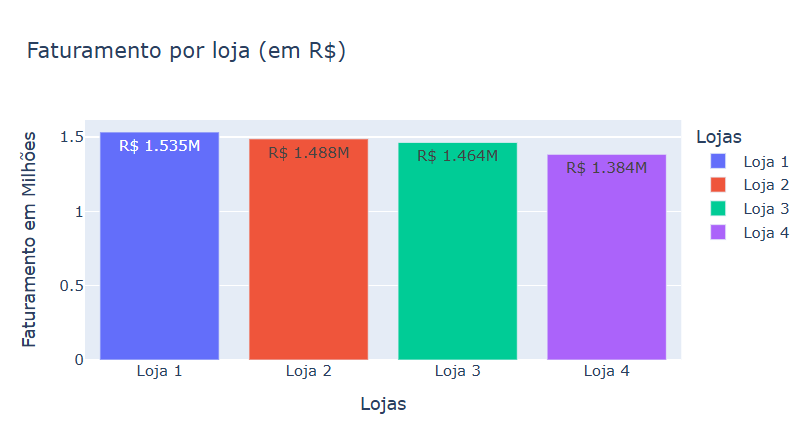

Podemos concluir com essa análise que:
- A **Loja 01 possui maior faturamento**
- Por outro lado, **Loja 04 possui o menor faturamento**.

## Vendas por categoria

As vendas por categoria nos ajudam a identificar quais são as categorias mais e menos compradas em cada loja.

Abaixo, segue o gráfico de vendas por categoria de cada loja:
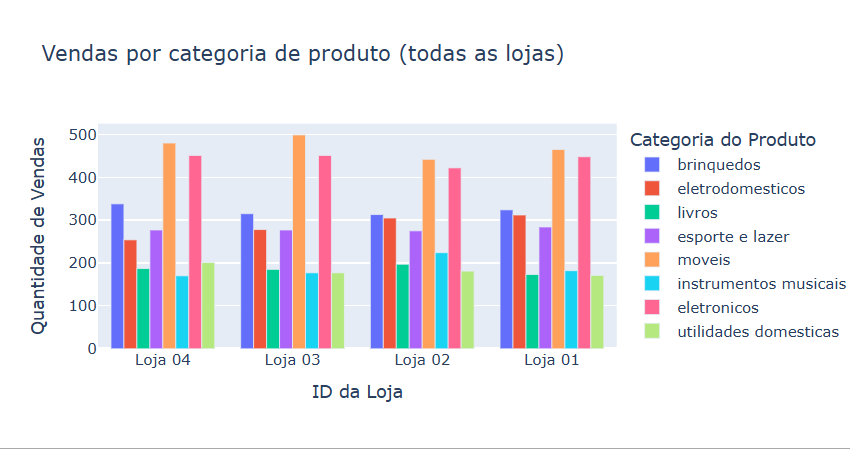
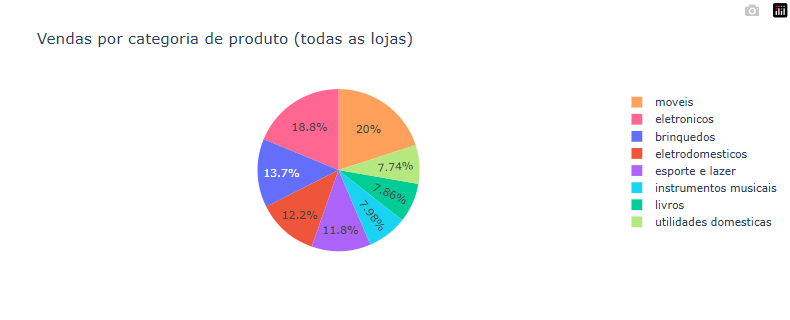

Com base nas análises, obtemos chegar às seguintes conclusões: 
- Em todas as lojas, a categoria de **móveis foi a mais vendida**, totalizando a quantidade de 1886 vendas, o que representa 20% do total de vendas por categoria em todas as lojas.
  
- Seguido da categoria de móveis, temos a categoria de **eletrônicos**, que é a segunda mais vendida, contabilizando 1772 vendas e representando 18.8% do total de vendas.
  
- Em todas as lojas, a categoria de brinquedos foi procurada e obteve uma quantidade de vendas superior à 300. Partindo do ponto que a maior quantidade de vendas registrada entre todas as lojas foi de 499, **a categoria de brinquedos apresenta um bom desempenho nas vendas, ocupando portanto a terceira posição no ranking de categorias mais procuradas.**

- Em todas as lojas, as categorias **Utilidades domésticas**, **Instrumentos musicais** e **Livros** apresentaram uma quantidade de vendas abaixo de 250, sendo essas **as categorias menos procuradas em todas as lojas.**

## Média de avaliação das lojas

As médias de avaliação das lojas representam a satisfação dos clientes em cada loja.

As médias, de 1 a 5, foram, respectivamente:

- **Loja 03:** `4.05`
- **Loja 02:** `4.04`
- **Loja 04:** `4.00`
- **Loja 01:** `3.98`

Pode-se perceber, com essa análise, que:
- A **Loja 3 possui uma maior avaliação**
- A **Loja 01, responsável pelo maior faturamento dentre todas as lojas do Sr.João, é que possui pior avaliação.**
- A **Loja 04, de menor faturamento, apresenta uma média de avaliações razoável**, não estando nem alta como as médias das lojas 03 e 02, e nem muito baixa como a avaliação da loja 01.

## Produtos mais e menos vendidos por loja

Seguem abaixo os gráficos dos 5 produtos mais e menos vendidos de cada loja:

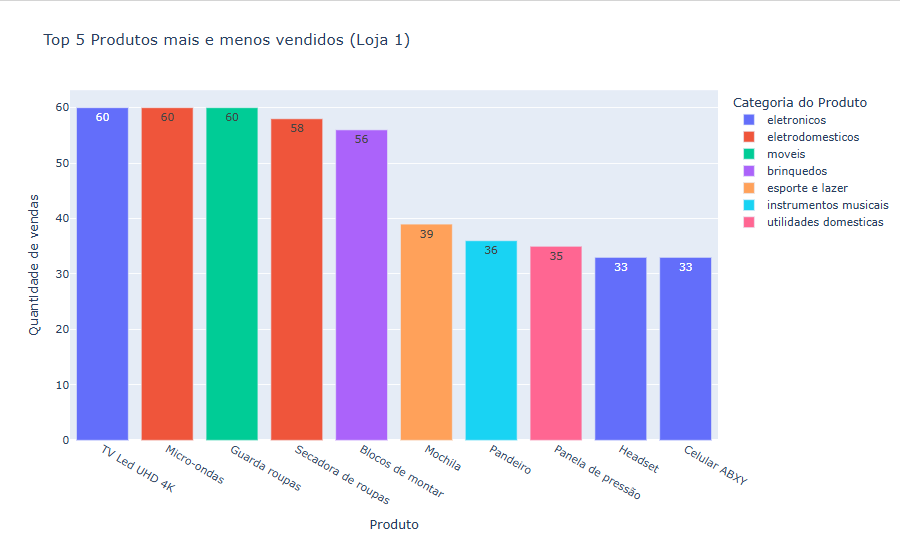

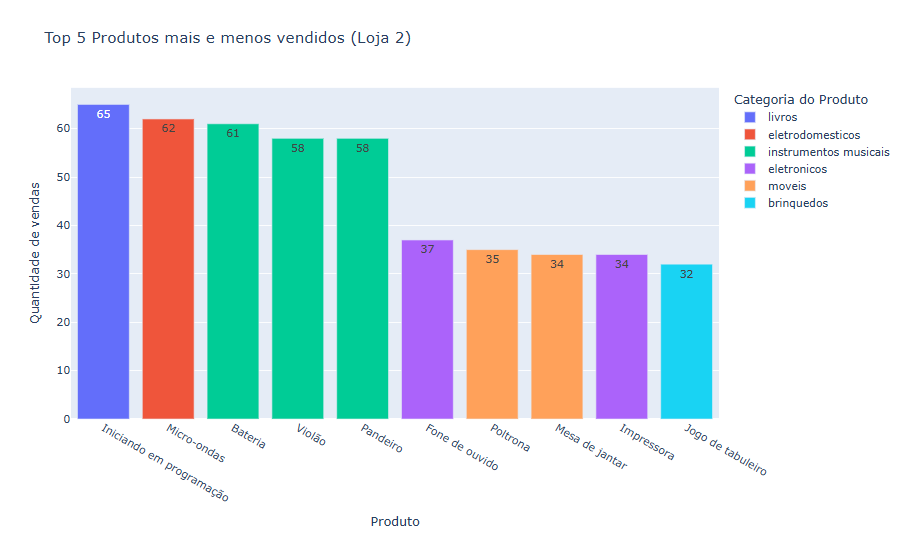

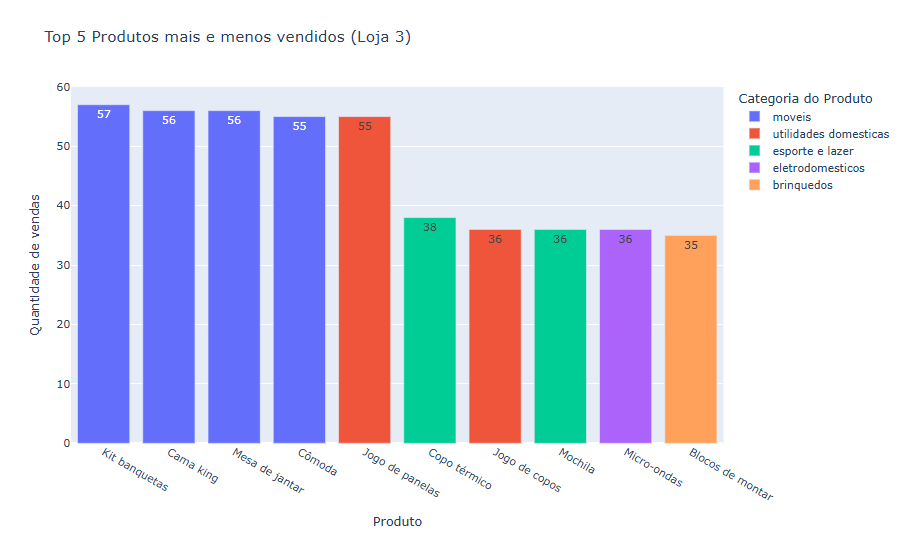

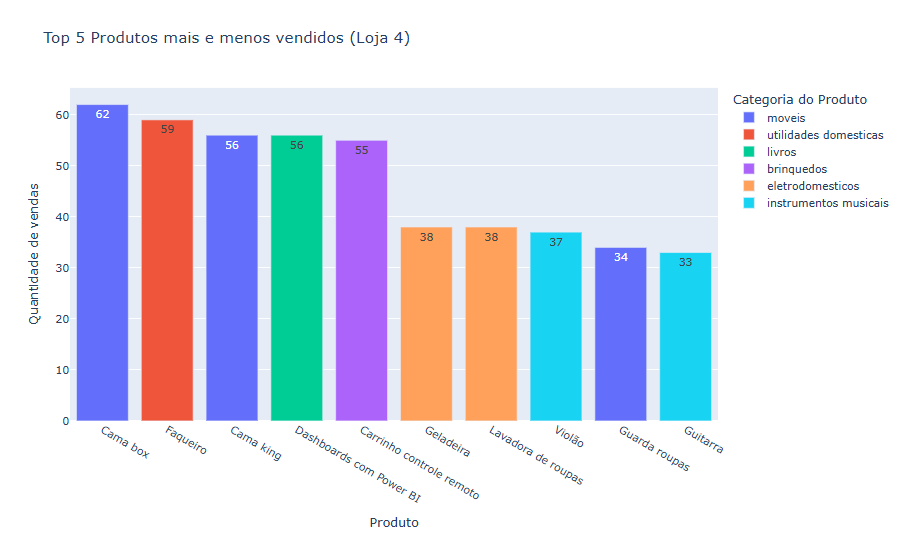

## Frete médio por loja

Segue abaixo o gráfico do preço médio de frete por loja:
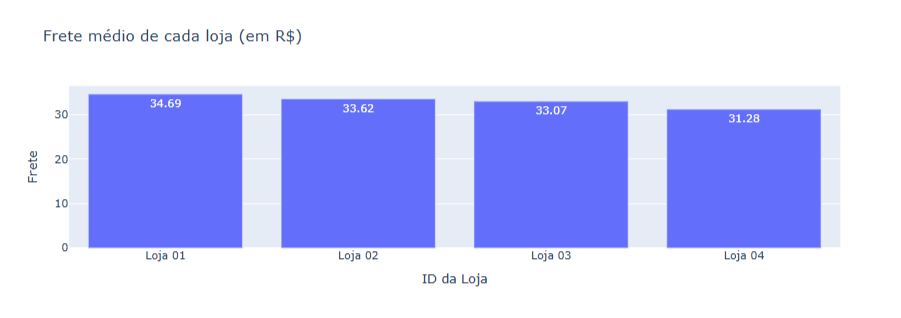

Podemos concluir, com a visualização, que:
- A **loja 01**, que possui a maior parte do faturamento, também **possui o maior preço médio de frete**.

- As lojas 02 e 03, que possuem um faturamento intermediário, seguem a mesma linha, com valor de frete também médio.

- A **loja 04**, que possui o menor faturamento, também possui o **menor preço de frete.**


## Qual loja deve ser vendida? 

### Cenário 01 - Venda da pior faturamento:
Com base nos dados analisados, podemos perceber que a `Loja 04` é a que possui menor faturamento e média de avaliações razoável. O seu frete médio é baixo, mas isso possivelmente se deve à baixa quantidade de vendas e faturamento da loja.

Diante desse desempenho abaixo, pode-se concluir que a venda da Loja 4 seria um ótimo negócio, visto que traria lucro pela sua venda, principalmente levando em consideração o desempenho da loja ao nos últimos tempos em faturamento.

### Cenário 02 - Venda de uma das lojas de faturamento intermediário:
As `Lojas 02 e 03` possuem as melhores avaliações, com ambas tendo médias de avaliação extremamente próximas, faturamentos intermediários e preços de frete também intermediários.

Tendo em vista que ambas as lojas possuem uma boa percepção do cliente, com base nas avaliações, apresentam valores de faturamento parecidos e um preço de frete que não é extremamente alto, a venda de uma dessas lojas viria a ser um bom negócio, com preferência para a venda da Loja 3. 

A escolha da Loja 3 se dá pois a loja apresenta um faturamento menor, embora parecido, com o da Loja 02, e uma avaliação semelhante com a da Loja 02 (com ambos tendo uma diferença de apenas 0.01 em suas médias de avaliação). Além disso, a sua venda poderia vir a subir a quantidade de vendas de produtos da categoria de móveis nas demais lojas, o que poderia aumentar consequentemente os faturamentos.

### Visão geral dos possíveis cenários

**Venda da Loja 04:**
- É a loja com pior desempenho em faturamento;
- Possui uma média de avaliações razoável, não sendo nem a pior e nem uma das melhores;
- Sua venda traria o fortalecimento das demais lojas, e ainda traria um alívio quanto às despesas;
- É a escolha de venda mais segura.

**Venda da Loja 03:**
- Dentre as lojas intermediárias (Loja 2 e Loja 3), é a que possui o menor faturamento;
- Embora possua uma nota mais alta (4.05), a sua média de avaliações é muito próxima da média da Loja 2 (4.04), que também é uma média alta;
- Sua venda traria fortalecimento quanto aos produtos vendidos nas demais lojas, visto que, com sua venda, a tendência é que as vendas de imóveis nas demais lojas aumentem;

### Recomendação final

Como recomendação final, a escolha mais secura é a venda da loja 4, pois é a que possui o pior faturamento e consequentemente o menor impacto na receita total. Além disso, a sua venda iria reduzir despesas quanto à operação da loja no geral.
